**TP n°3** :  Caractérisation d'une loi de probabilité sur un espace d'images.

#Plan

##Partie I:

Régression quantile.
* Fonction de coût adaptée
* Régression quantile: un premier exemple
* Régression quantile simultanée


##Partie II:

Echantillonnage par une méthode générative: l'exemple des GAN.
* Principe de base et premier entraînement 
* Limites
* Quelques solutions
* Un GAN conditionnel


Durée : 3 h

### Introduction à la partie I:

A travers le premier exercice, on rappelle quelques notions essentielles: loi jointe, lois marginales, loi conditionnelle.

**Exercice 1 (rappel)** : notions de densité, lois marginale, loi jointe, loi conditionnelle, couplage.

Soit $X = (X_1, X_2)$ un [vecteur gaussien](https://) de loi $\mathcal{N}(0, \Gamma)$ avec $\Gamma = \begin{pmatrix} 1 & \epsilon \\ \epsilon & 1 \end{pmatrix}$ et $\epsilon \in [0,1[$

**a.** Quelle est la densité de $X$ ?

**b.** Quelles sont les lois marginales de $X$ ?

**c.** Calculer la loi conditionnelle de $X_1$ sachant $X_2 = x_2$. Vers quel couplage tend-on lorsque $\epsilon \to 1$ ?

**Note**: un couplage de deux lois $\mathcal{P}$, $\mathcal{Q}$ est un couple de variables aléatoires (X,Y) tel que $X \sim \mathcal{P}$ et $X \sim \mathcal{Q}$. 

### Partie I: régression quantile   

Dans cette partie, on se situe de nouveau dans le cas où les entrées $X$ et les cibles $Y$ de l'apprentissage sont des images de mêmes tailles.
Par contre, on suppose que la dépendance de $Y$ à $X$ est de nature probabiliste. En d'autres termes, il existe des lois conditionnelles $\mathcal{L}_{\{Y | X = x \}}$, et ce sont ces lois **qu'il faudrait pouvoir caractériser**. \\

Ici, nous nous limitons aux marginales conditionnelles, c'est à dire aux lois $\mathcal{L}_{\{Y_{i,j} | X = x \}}$ où $Y_{i,j}$ représente la valeur de la cible $Y$ au pixel $(i,j)$. \\
Pour caractériser ces lois, plusieurs approches sont envisageables. On peut par exemple chercher à en estimer les quantiles ou les moments. Les exercices suivants illustrent une méthode d'estimation des quantiles.
 

**Exercice 2**: une fonction de coût adaptée

Nous avons déjà vu au TP précédent que l'utilisation de la MAE conduisait le modèle à fournir la médiane conditionnelle, qui est un quantile particulier.
Pour estimer les autres quantiles, il suffit de modifier la MAE. 

C'est ce que nous allons faire sur un problème simple où le lien entre l'entrée et la cible est défini par:  
$$Y_{i,j} \sim \mathcal{N}({x}_{i,j}^2, 0.2 \times x_{i,j}) $$

La fonction *gen_proba* du module *utile.py* va nous permettre de "parcourir" notre jeu de données, ou en d'autres termes d'échantillonner le couple $(X,Y)$. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import time

import torch
import torchvision
import torch.nn as nn   
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, models, transforms

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
os.chdir('drive/MyDrive/TP_2022_corr')

In [ ]:
os.listdir() 
from utile import *

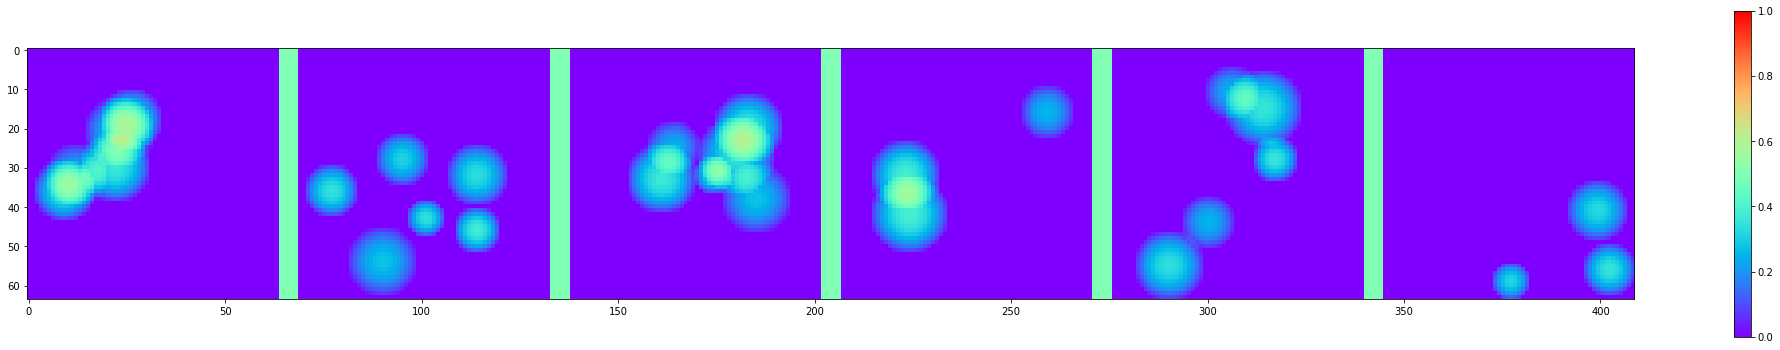

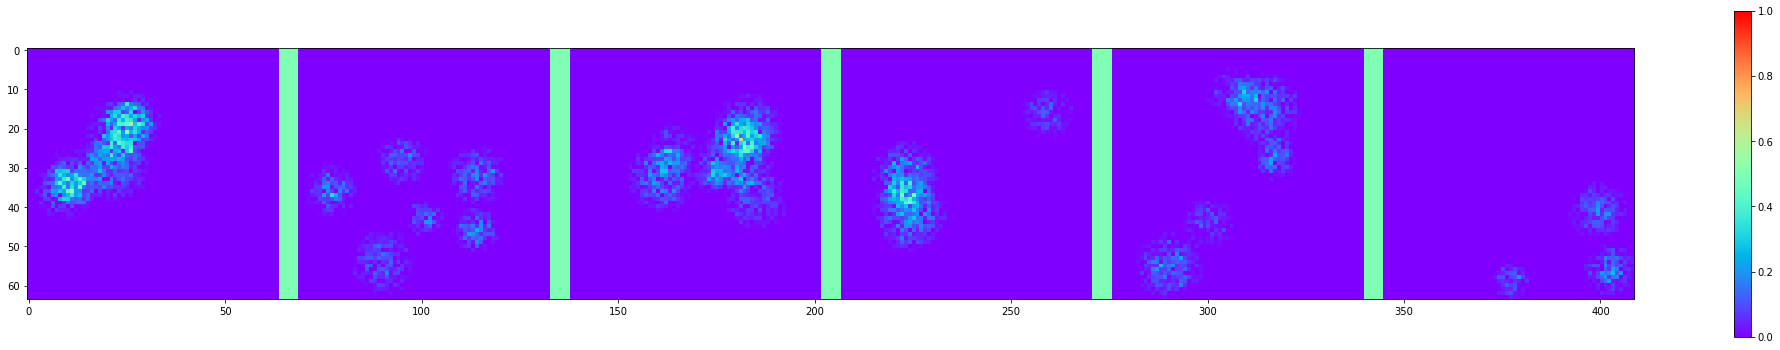

In [ ]:
#Echantillonnage du couple (X,Y) :

input, target = gen_proba(6)
#Entrées 
fig0 = plt.figure(0, figsize=(36, 6))
voir_batch2D(input, 6, fig0, k=0, min_scale=0,max_scale=1)

#Cibles 
fig1 = plt.figure(1, figsize=(36, 6))
voir_batch2D(target, 6, fig1, k=0, min_scale=0,max_scale=1)

**Q1** Montrer que la fonction de coût définie par:
$$\mathcal{L}(Y,f_\theta(x)) = \rho_t(Y - f_\theta(x))$$
où:
$$\rho_t(u) = t \times max(u,0) + (t-1) \times min(u,0) $$


est d'espérance minimale lorsque $f_\theta(x)$ vaut le quantile d'ordre $t$ associé à $p(Y|X=x)$.



**Q2** En quoi $\rho_t$ généralise-t-elle la MAE ? \\
Dans la cellule suivante, coder $\rho_t$ avec la méthode [.clamp()](https://pytorch.org/docs/stable/generated/torch.clamp.html). Entraîner un U-Net à estimer le premier décile (Aborder les exercices suivants en attendant).

In [ ]:
####nouvelle fonction rho:

def rhot(y,t):
        ...
        return loss

def criterion(output, target):
  return rhot(target-output,0.1)  #on vise le premier décile

In [ ]:
fcn = UNet(1,1,16).cuda()  #1 canal entrée, 1 canal de sortie, paramètre taille du réseau: 16
import torch.optim as optim
optimizer = optim.Adam(fcn.parameters(), 10**(-3))

In [ ]:
nepochs = 50
nbatches = 100
batchsize = 64

train_losses = []


for epoch in range(nepochs):
    
    print("Epoch " + str(epoch))
    epoch_losses  = []
    for i in range(nbatches):    # nbatch = datasetsize/batchsize


        #Echantillonnage de (X,Y)
        ...

        #Passage sur GPU
        ...

        # Estimation (passe avant)
        ...

        # Fonction de coût
        ...
        
        # Gradients
        ...
        
        # MAJ des poids
        ...


        epoch_losses.append(loss.detach().cpu())

        del target, input, loss
        torch.cuda.empty_cache()     

    epoch_loss = np.mean(epoch_losses)
    train_losses.append(epoch_loss)    
    print('epoch loss : \n')
    print(epoch_loss)

**Q3** Visualiser le résultat. Utiliser [torch.distributions.normal.Normal](https://pytorch.org/docs/stable/distributions.html) pour vérifier la convergence.

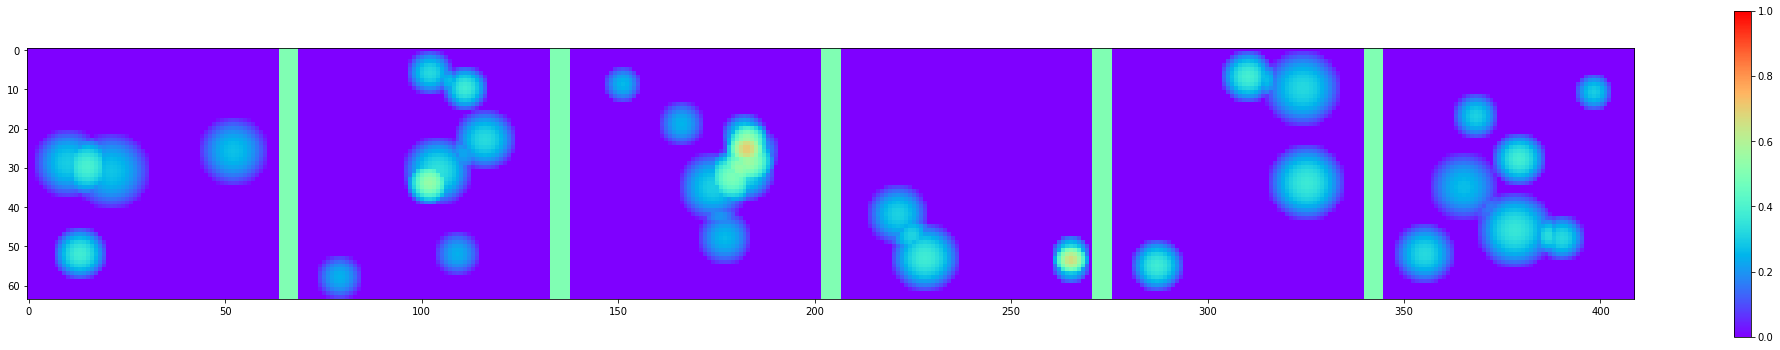

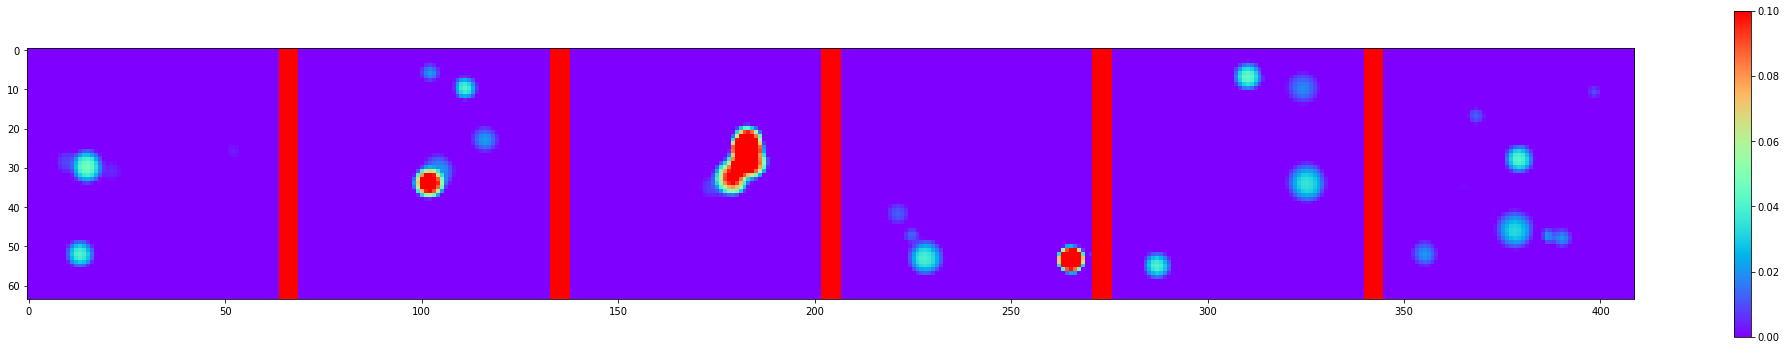

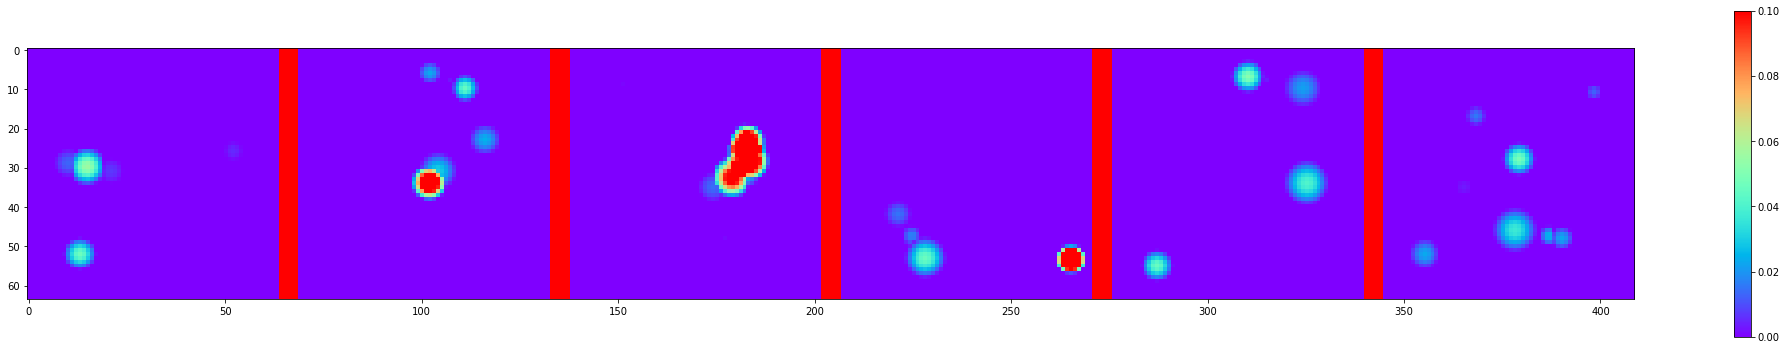

/content/drive/MyDrive/TP_2022_corr/utile.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1,1,1)


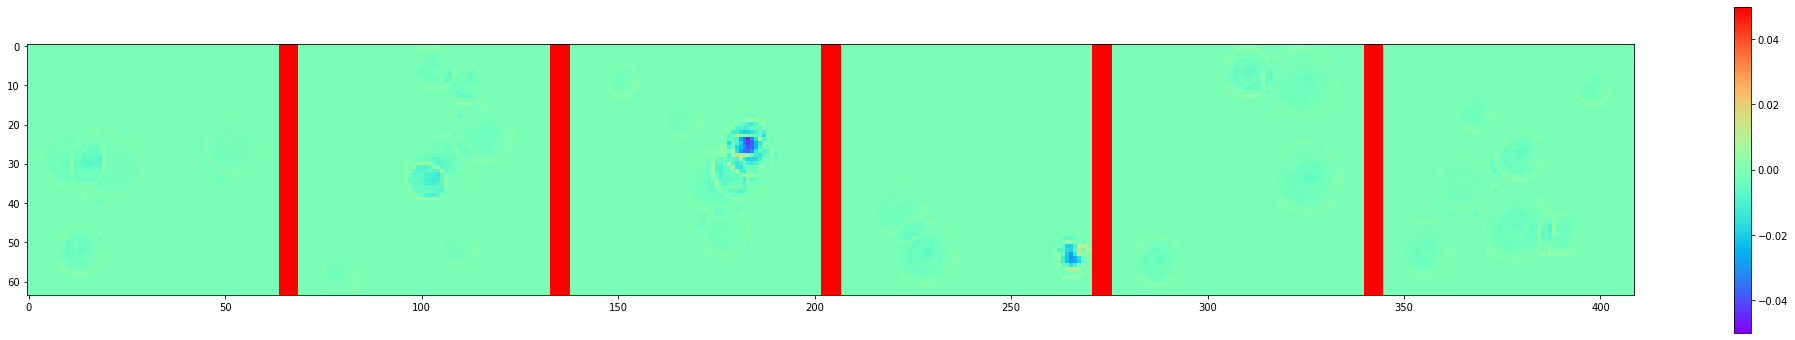

In [ ]:
#visualisation:

fcn.eval()

input, target = gen_proba(6)

output = ...



fig = plt.figure(0, figsize=(36, 6))
voir_batch2D(input, 6, fig, k=0, min_scale=0,max_scale=1) #Entrées: première ligne
fig1 = plt.figure(1, figsize=(36, 6))
voir_batch2D(output.detach().cpu(), 6, fig1, k=0, min_scale=0,max_scale=0.1) #Sorties: deuxième ligne

m = torch.distributions.normal.Normal(input**2, 0.2*input+0.000001, validate_args=None)
quantiles = m.icdf(0*input + 0.1)
fig2 = plt.figure(2, figsize=(36, 6))
voir_batch2D(quantiles, 6, fig2, k=0, min_scale=0.,max_scale=0.1) #Premier décile (ground truth)
fig3 = plt.figure(3, figsize=(36, 6))
voir_batch2D(output.detach().cpu() - quantiles, 6, fig2, k=0, min_scale=-0.05,max_scale=0.05) #sorties - ground truth




**Exercice 3**  

On peut chercher à estimer $n$ quantiles à la fois. Pour cela, le plus simple est de:
* changer le nombre de canaux en sortie du U-Net -par exemple 99 canaux s'il s'agit d'estimer les $n = 100$ quantiles d'ordres 1%, 2%, ... 99%.
* définir la fonction de coût globale en sommant les fonctions de coûts individuelles pour chacun des canaux.

Le but de cet exercice est coder une version matricielle de cette fonction de coût globale et d'illustrer la convergence de l'apprentissage. 

**Q1** Soit $t$ un vecteur de taille $N-1$ et $M$ un tenseur d'ordre 4. Terminer la fonction $dot(t, M) = M^{\prime}$ où $M^{\prime}_{b,i,j} =  \underset{0<c<n}{\sum} t_c  \times M_{b,c,i,j}$. \\
Cette fonction permettra d'appliquer $\rho_{t_c}$ à chaque canal $c$ de la sortie $M$ ($b$ représente l'indice du batch et $i,j$ les dimensions spatiales).

In [ ]:
def dot(t ,  M):  
	return (M * t.view( ... ) ).sum(dim=1)

**Q2** Compléter la classe *QuantileLoss*:

In [ ]:
class QuantileLoss(torch.nn.Module):
    #output doit être de taille: batch_size * (n-1) * nx * ny
    #P(|y-y*|>r) = t%
    def __init__(self , n):
        super(QuantileLoss, self).__init__()
        self.n = n   # discretisation de la CDF n= 100 -> centiles
        self.t = torch.arange(1/n,1,1/n).cuda()  #premier: 1st centile, dernier: 99 centile
        
    def forward(self, output, target):
        
        bs, _ , nx, ny = target.shape
        diff = target.view(bs, 1, nx, ny)  -  output

        
    #calcul des losses de la régression quantile
        loss_by_pix = dot( self.t , ...  ) + dot( self.t - 1 , ... )  
        loss = torch.mean(loss_by_pix)

        return loss

**Q3** Lancer l'entraînement pour $n=100$ puis évaluer l'estimation.

In [ ]:
n = 100
fcn = UNet(1,n-1,32).cuda()  #1 canal entrée, n-1 canal de sortie, paramètre taille du réseau: 16
import torch.optim as optim
optimizer = optim.Adam(fcn.parameters(), 10**(-3))

criterion = QuantileLoss(n)



In [ ]:
nepochs = 40
nbatches = 100
batchsize = 64

train_losses = []


for epoch in range(nepochs):
    print("Epoch " + str(epoch))
    epoch_losses  = []
    for i in range(nbatches):    
        
        
      ...
  

    epoch_loss = np.mean(epoch_losses)
    train_losses.append(epoch_loss)    
    print('epoch loss : \n')
    print(epoch_loss)

